In [15]:
%pylab inline
%run params.py

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

from plotting_functions import * 

# Simulated data
simdata = LoadMLData(os.path.join(DATAPATH, "simulations", "tree_maxlik.tab"))
simtruth = pd.read_csv(os.path.join(DATAPATH, "simulations", "tree_truth.bed"), sep="\t", names=["chrom","start","end","truemu","truebeta"])
simdata = pd.merge(simdata, simtruth, on=["chrom","start","end"])
sim = pd.read_csv(os.path.join(DATAPATH, "simulations", "tree_calibrate_errors.tab"), sep="\t", names=["ff","coverage","coverage2"])
simst = pd.read_csv(os.path.join(DATAPATH, "simulations", "treestutter_calibrate_errors.tab"), sep="\t", names=["ff","coverage","coverage2"])

# Y err data
y_sgdp = pd.read_csv(os.path.join(DATAPATH, "ystr_validation", "ystrs_sgdp_calibrate_errors.tab"), sep="\t", names=["ff","coverage","coverage2"])
y_1kg = pd.read_csv(os.path.join(DATAPATH, "ystr_validation", "ystrs_1kg_calibrate_errors.tab"), sep="\t", names=["ff","coverage","coverage2"])
y_sgdp_np = pd.read_csv(os.path.join(DATAPATH, "ystr_validation", "ystrs_sgdp_calibrate_errors_np.tab"), sep="\t", names=["ff","coverage"])
y_1kg_np = pd.read_csv(os.path.join(DATAPATH, "ystr_validation", "ystrs_1kg_calibrate_errors_np.tab"), sep="\t", names=["ff","coverage"])

# Autosomal data
codis = pd.read_csv(os.path.join(DATAPATH, "autosomal_validation", "codis_estimates_ml_calibrate_errors_np.tab"), sep="\t", names=["ff","coverage"])
sunetal = pd.read_csv(os.path.join(DATAPATH, "autosomal_validation", "sunetal_estimates_ml_calibrate_errors_np.tab"), sep="\t", names=["ff","coverage"])

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


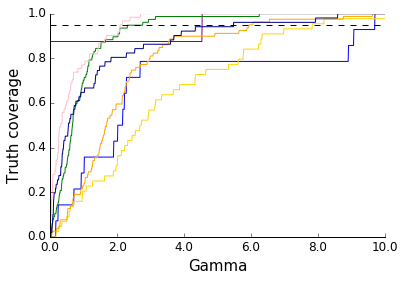

In [8]:
# A: gamma*stderr on simdata
fig = plt.figure()
ax = fig.add_subplot(111)
MULT = 1.96
alphas = np.arange(0, 10, 0.01)
truemu = sorted(list(set(simdata.truemu)))
colors = ["purple","blue","gold","orange","green","pink","darkblue"]
for tm in truemu:
    d = simdata[simdata.truemu == tm]
    d = d[~np.isnan(d.stderr_ml) & (d.stderr_ml !=0)]
    coverages = []
    for a in alphas:
        low = d.apply(lambda x: x.est_logmu_ml - MULT*a*x.stderr_ml, 1)
        high = d.apply(lambda x: x.est_logmu_ml + MULT*a*x.stderr_ml, 1)
        c = np.mean((low<=np.log10(tm)) & (high>=np.log10(tm)))
        coverages.append(c)
    ax.plot(alphas, coverages, color=colors[truemu.index(tm)])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left();
ax.axhline(0.95, color="black", linestyle="dashed")
ax.set_xlabel("Gamma", size=15)
ax.set_ylabel("Truth coverage", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12);
fig.savefig(os.path.join(PLOTDIR, "SupplementalFigure3_sim1.pdf"))

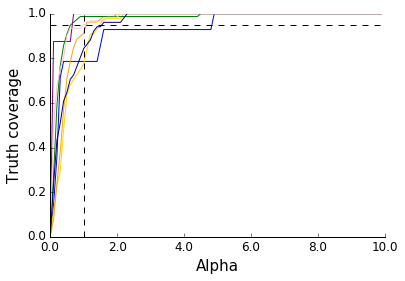

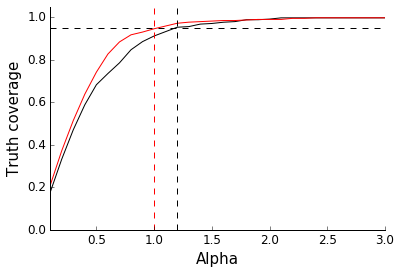

In [9]:
# B: gamma*abs(logmu_est)*stderr
fig = plt.figure()
ax = fig.add_subplot(111)
MULT = 1.96
alphas = np.arange(0, 10, 0.1)
truemu = sorted(list(set(simdata.truemu)))
colors = ["purple","blue","gold","orange","green","pink","darkblue"]
for tm in truemu:
    d = simdata[simdata.truemu == tm]
    d = d[~np.isnan(d.stderr_ml) & (d.stderr_ml !=0)]
    coverages = []
    for a in alphas:
        low = d.apply(lambda x: x.est_logmu_ml - MULT*a*abs(x.est_logmu_ml)*x.stderr_ml, 1)
        high = d.apply(lambda x: x.est_logmu_ml + MULT*a*abs(x.est_logmu_ml)*x.stderr_ml, 1)
        c = np.mean((low<=np.log10(tm)) & (high>=np.log10(tm)))
        coverages.append(c)
    ax.plot(alphas, coverages, color=colors[truemu.index(tm)])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left();
ax.axhline(0.95, color="black", linestyle="dashed")
ax.set_xlabel("Alpha", size=15)
ax.set_ylabel("Truth coverage", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12);
ax.axvline(1.0, color="black", linestyle="dashed")
fig.savefig(os.path.join(PLOTDIR, "SupplementalFigure3_sim2main.pdf"))

# Inset
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sim.ff, sim.coverage2, color="black")
ax.plot(simst.ff, simst.coverage2, color="red")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left();
ax.set_xlim(left=0.1, right=3)
ax.set_ylim(bottom=0, top=1.05)
ax.axhline(0.95, color="black", linestyle="dashed")
ax.axvline(1.2, color="black", linestyle="dashed")
ax.axvline(1.0, color="red", linestyle="dashed")
ax.set_xlabel("Alpha", size=15)
ax.set_ylabel("Truth coverage", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12);
fig.savefig(os.path.join(PLOTDIR, "SupplementalFigure3_sim2inset.pdf"))

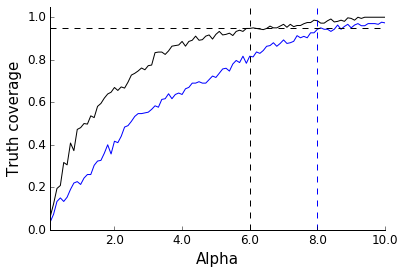

In [10]:
# C: YSTR vs. Thomas
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y_sgdp.ff, y_sgdp.coverage2, color="black")
ax.plot(y_1kg.ff, y_1kg.coverage2, color="blue")
ax.set_xlim(left=0.1, right=10)
ax.set_ylim(bottom=0, top=1.05)
ax.set_xlabel("Alpha", size=15)
ax.set_ylabel("Truth coverage", size=15)
ax.axhline(0.95, color="black", linestyle="dashed")
ax.axvline(6.0, color="black", linestyle="dashed")
ax.axvline(8.0, color="blue", linestyle="dashed")
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.set_xticklabels(ax.get_xticks(), size=12);
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left();
fig.savefig(os.path.join(PLOTDIR, "SupplementalFigure3_ymutea.pdf"))

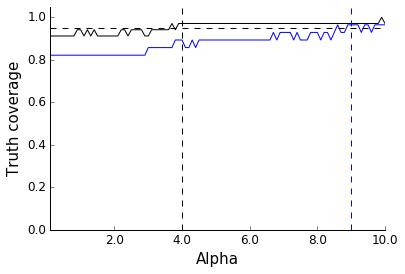

In [11]:
# D: YSTR vs. Ballantyne
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y_sgdp_np.ff, y_sgdp_np.coverage, color="black")
ax.plot(y_1kg_np.ff, y_1kg_np.coverage, color="blue")
ax.set_xlim(left=0.1, right=10)
ax.set_ylim(bottom=0, top=1.05)
ax.set_xlabel("Alpha", size=15)
ax.set_ylabel("Truth coverage", size=15)
ax.axhline(0.95, color="black", linestyle="dashed")
ax.axvline(4.0, color="black", linestyle="dashed")
ax.axvline(9.0, color="blue", linestyle="dashed")
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.set_xticklabels(ax.get_xticks(), size=12);
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left();
fig.savefig(os.path.join(PLOTDIR, "SupplementalFigure3_ynp.pdf"))

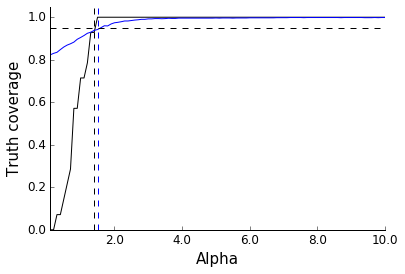

In [16]:
# CODIS/Sunetal
# D: YSTR vs. Ballantyne
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(codis.ff, codis.coverage, color="black")
ax.plot(sunetal.ff, sunetal.coverage, color="blue")
ax.set_xlim(left=0.1, right=10)
ax.set_ylim(bottom=0, top=1.05)
ax.set_xlabel("Alpha", size=15)
ax.set_ylabel("Truth coverage", size=15)
ax.axhline(0.95, color="black", linestyle="dashed")
ax.axvline(1.4, color="black", linestyle="dashed")
ax.axvline(1.5, color="blue", linestyle="dashed")
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.set_xticklabels(ax.get_xticks(), size=12);
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left();
fig.savefig(os.path.join(PLOTDIR, "SupplementalFigure3_autonp.pdf"))